# Explore Album/Band/Musician Data

This notebook explores the Album/Band/Musician dataset. This study is asking, "What is the average band member age of a guitar-oriented band on the release of their debut album"?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
df_bands = pd.read_csv('band_data/band_first_albums.csv')
df_bands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        198 non-null    object
 1   ReleaseDate  198 non-null    object
 2   FirstName    198 non-null    object
 3   LastName     195 non-null    object
 4   DateOfBirth  186 non-null    object
 5   Band         198 non-null    object
dtypes: object(6)
memory usage: 9.4+ KB


Inspection of the dataset shows that it is missing the date of birth for 13 band members. Since this item of data is critical for this study these rows will be dropped.

In [26]:
has_dob = pd.notnull(df_bands["DateOfBirth"])
df_bands = df_bands[has_dob]

In [27]:
df_bands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 197
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        186 non-null    object
 1   ReleaseDate  186 non-null    object
 2   FirstName    186 non-null    object
 3   LastName     183 non-null    object
 4   DateOfBirth  186 non-null    object
 5   Band         186 non-null    object
dtypes: object(6)
memory usage: 10.2+ KB


It is necessary to calculate the age of each band member when their band's first album was released, rounded down to the nearest whole number. Before this can be done, the timestamps in the dataset need to be converted to datetime objects.

In [28]:
df_bands['ReleaseDate'] = pd.to_datetime(df_bands['ReleaseDate'])
df_bands['DateOfBirth'] = pd.to_datetime(df_bands['DateOfBirth'])
df_bands['Age'] = ((df_bands['ReleaseDate'] - df_bands['DateOfBirth']) / np.timedelta64(1, 'Y')).apply(int)

In [29]:
df_bands.head()

,Title,ReleaseDate,FirstName,LastName,DateOfBirth,Band,Age
0,Leisure,1991-08-26,Damon,Albarn,1968-03-23,Blur,23
1,Leisure,1991-08-26,Graham,Coxon,1969-03-12,Blur,22
2,Leisure,1991-08-26,Alex,James,1968-11-21,Blur,22
3,Leisure,1991-08-26,Dave,Rowntree,1964-05-08,Blur,27
4,Definitely Maybe,1994-08-30,Liam,Gallagher,1972-09-21,Oasis,21


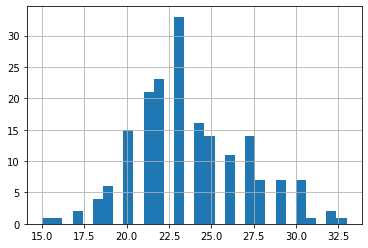

In [30]:
df_bands['Age'].hist(bins=30);

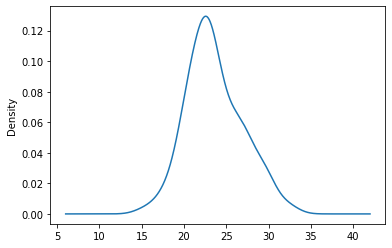

In [31]:
df_bands['Age'].plot.density();

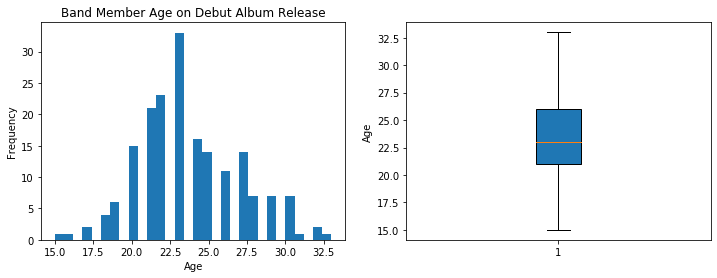

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(df_bands['Age'], bins=30)
axes[0].set_title('Band Member Age on Debut Album Release')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
#axes[0].text(2, 2, df_bands['Age'].mean())

axes[1].boxplot(df_bands['Age'], patch_artist=True)
axes[1].set_ylabel('Age');

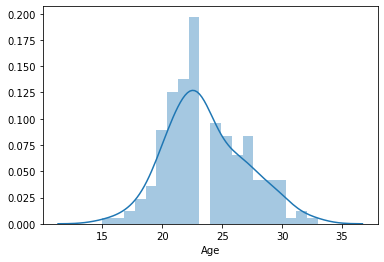

In [69]:
sns.distplot(df_bands['Age'], bins=20);